현대 자동차 데이터를 이용
가격:1135 
년식:2015
연비: 15
마력:100
토크:13.6
연료:가솔린
하이브리드:0
배기량:1368
중량:1035
변속기:수동

인경우 종류( 준중형, 소형, 대형)
를 예측하시요.
 KNN, decision tree, naive_bayes, svc 
각각의 모델에 대해 

0. 각모델별 예측값 구하시요.
1. f1 score(train, test) , confusion matrix,
를 구하시요

2. 각모델별 train ,test f1 를  bar 그래프로 그리고
가장높은 f1 score 의 모델을 확인하시요.


## 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.compose import make_column_transformer


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB #, GaussianNB, BernoulliNB,


import warnings
warnings.simplefilter('ignore')

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

## 데이터 로드 및 분리

In [2]:
df = pd.read_excel('./data5/hyundaiCar.xlsx')
df.head()

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


In [3]:
df.nunique()

가격       57
년식        5
종류        4
연비       44
마력       28
토크       28
연료        3
하이브리드     2
배기량      16
중량       48
변속기       2
dtype: int64

In [4]:
df.columns

Index(['가격', '년식', '종류', '연비', '마력', '토크', '연료', '하이브리드', '배기량', '중량', '변속기'], dtype='object')

In [5]:
x_data = df[['가격', '년식', '연비', '마력', '토크', '연료', '하이브리드', '배기량', '중량', '변속기']]
y_data = df[['종류']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1, stratify=y_data, test_size=0.2)

In [7]:
# 예측 데이터
xd = pd.DataFrame([[1135, 2015, 15, 100, 13.6, '가솔린', 0, 1368, 1035, '수동']], columns=x_data.columns)
xd

,가격,년식,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1135,2015,15,100,13.6,가솔린,0,1368,1035,수동


# 문제 풀이

## 1. KNN

### 1.1 모델 생성 및 학습

In [8]:
# 모델 생성 및 학습
ct = make_column_transformer((OneHotEncoder(),['연료', '변속기']),
                             (StandardScaler(), ['가격', '년식', '연비', '마력', '토크', '하이브리드', '배기량', '중량']))
pipe = make_pipeline(ct, KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8]}
grid_knn = GridSearchCV(pipe, param_grid=param_grid, scoring='f1_macro')
grid_knn.fit(x_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['연료',
                                                                          '변속기']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['가격',
                                                                          '년식',
                                                                          '연비',
                                                                          '마력',
                                                                          '토크',
              

### 1.2 best score 및 파라미터

In [9]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'kneighborsclassifier__n_neighbors': 6}
0.746547619047619


### 1.3 예측문제 결과

In [10]:
res = grid_knn.best_estimator_.predict(xd)
print('예측 레이블:',res[0])

예측 레이블: 소형


### 1.4 f1-score 및 confusion matrix

In [11]:
# f1-score
y_train_pred = grid_knn.best_estimator_.predict(x_train)
f1_knn_train = f1_score(y_train, y_train_pred, average='macro')
print('train f1-score:', f1_knn_train)


y_test_pred = grid_knn.best_estimator_.predict(x_test)
f1_knn_test = f1_score(y_test, y_test_pred, average='macro')
print('test f1-score:', f1_knn_test)


train f1-score: 0.800054945054945
test f1-score: 0.8582251082251082


In [12]:
grid_knn.classes_

array(['대형', '소형', '준중형', '중형'], dtype=object)

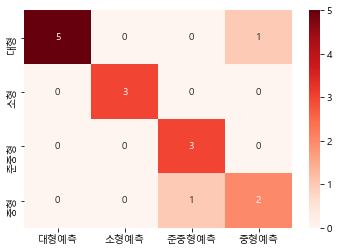

In [13]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Reds', 
            xticklabels=['대형예측', '소형예측', '준중형예측', '중형예측'],
            yticklabels=grid_knn.classes_, fmt='d')
plt.show()

## 2. Decision Tree

### 2.1 모델 생성 및 학습

In [14]:
ct = make_column_transformer((OrdinalEncoder(),['연료', '변속기']), remainder='passthrough')
pipe = make_pipeline(ct, DecisionTreeClassifier())

param_grid = {'decisiontreeclassifier__max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
grid_tree = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_tree.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['연료',
                                                                          '변속기'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': [2, 3, 4, 5, 6, 7,
                                                               8, 9, 10, 11, 12,
                                                               13, 14]},
             scoring='f1_macro')

### 2.2 best score 및 파라미터


In [15]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)

{'decisiontreeclassifier__max_depth': 3}
0.8866666666666667


### 2.3 예측문제 결과

In [16]:
res = grid_tree.best_estimator_.predict(xd)
print('예측 레이블:',res[0])

예측 레이블: 소형


### 2.4 f1-score 및 confusion matrix

In [17]:
# f1-score
y_train_pred = grid_tree.best_estimator_.predict(x_train)
f1_tree_train =  f1_score(y_train, y_train_pred, average='macro')
print('train f1-score:', f1_tree_train)


y_test_pred = grid_tree.best_estimator_.predict(x_test)
f1_tree_test = f1_score(y_test, y_test_pred, average='macro')
print('test f1-score:', f1_tree_test)


train f1-score: 0.9647727272727273
test f1-score: 0.9415584415584416


In [18]:
grid_tree.classes_

array(['대형', '소형', '준중형', '중형'], dtype=object)

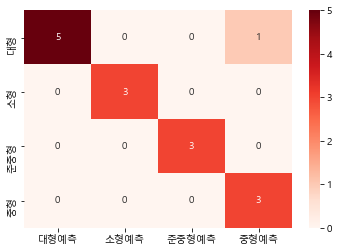

In [19]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Reds', 
            xticklabels=['대형예측', '소형예측', '준중형예측', '중형예측'],
            yticklabels=grid_tree.classes_, fmt='d')
plt.show()

## 3. naive bayes

### 3.1 모델 생성 및 학습

In [20]:
ct = make_column_transformer((OrdinalEncoder(),['연료', '변속기']), remainder='passthrough')
pipe = make_pipeline(ct, GaussianNB())
param_grid = {}
grid_bayes = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_bayes.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['연료',
                                                                          '변속기'])])),
                                       ('gaussiannb', GaussianNB())]),
             param_grid={}, scoring='f1_macro')

### 3.2 best score 및 파라미터

In [21]:
print(grid_bayes.best_score_)

0.6666269841269841


### 3.3 예측문제 결과

In [22]:
res = grid_bayes.best_estimator_.predict(xd)
print('예측 레이블:',res[0])

예측 레이블: 소형


### 3.4  f1-score 및 confusion matrix

In [23]:
# f1-score
y_train_pred = grid_bayes.best_estimator_.predict(x_train)
f1_bayes_train = f1_score(y_train, y_train_pred, average='macro')
print('train f1-score:', f1_bayes_train)


y_test_pred = grid_bayes.best_estimator_.predict(x_test)
f1_bayes_test =  f1_score(y_test, y_test_pred, average='macro')
print('test f1-score:', f1_bayes_test)

train f1-score: 0.8534148502569555
test f1-score: 0.8647727272727272


In [24]:
grid_bayes.classes_

array(['대형', '소형', '준중형', '중형'], dtype='<U3')

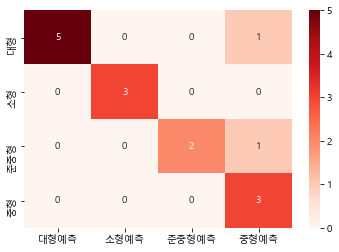

In [25]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Reds', 
            xticklabels=['대형예측', '소형예측', '준중형예측', '중형예측'],
            yticklabels=grid_bayes.classes_, fmt='d')
plt.show()

## 4. SVM

### 4.1 모델 생성 및 학습

In [26]:
ct = make_column_transformer((OneHotEncoder(),['연료', '변속기']), remainder='passthrough')
pipe = make_pipeline(ct, SVC())
param_grid = {'svc__C':[0, 0.25, 0.5, 1, 3, 5, 10, 20, 50, 100],
              'svc__gamma':['scale', 'auto'], 
              'svc__kernel':[ 'poly', 'rbf','precomputed']}
grid_svm = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_macro')
grid_svm.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['연료',
                                                                          '변속기'])])),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0, 0.25, 0.5, 1, 3, 5, 10, 20, 50, 100],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['poly', 'rbf', 'precomputed']},
             scoring='f1_macro')

### 4.2 best score 및 파라미터

In [27]:
print(grid_svm.best_params_)
print(grid_svm.best_score_)

{'svc__C': 50, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
0.9066666666666666


### 4.3 예측문제 결과

In [28]:
res = grid_svm.best_estimator_.predict(xd)
print('예측 레이블:',res[0])

예측 레이블: 소형


### 4.4 f1-score 및 confusion matrix

In [29]:
# f1-score
y_train_pred = grid_svm.best_estimator_.predict(x_train)
f1_svm_train = f1_score(y_train, y_train_pred, average='macro')
print('train f1-score:', f1_svm_train)


y_test_pred = grid_svm.best_estimator_.predict(x_test)
f1_svm_test = f1_score(y_test, y_test_pred, average='macro')
print('test f1-score:', f1_svm_test)

train f1-score: 0.9280317106404062
test f1-score: 0.875


In [30]:
grid_svm.classes_

array(['대형', '소형', '준중형', '중형'], dtype=object)

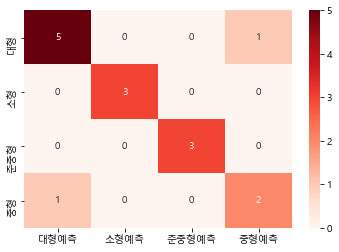

In [32]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='Reds', 
            xticklabels=['대형예측', '소형예측', '준중형예측', '중형예측'],
            yticklabels=grid_svm.classes_, fmt='d')
plt.show()

## 모델 별 train ,test에 대한 f1-score bar 그래프

In [58]:
result = pd.DataFrame([[f1_knn_train,'train'], [f1_tree_train,'train'], [f1_bayes_train,'train'], [f1_svm_train,'train'], 
                       [f1_knn_test,'test'], [f1_tree_test,'test'], [f1_bayes_test,'test'], [f1_svm_test,'test']],
                      columns = ['f1-score', 'kind']
                       )
result.index = ['knn','decision_tree', 'naive bayes', 'svm', 'knn','decision_tree', 'naive bayes', 'svm']
result

,f1-score,kind
knn,0.800055,train
decision_tree,0.964773,train
naive bayes,0.853415,train
svm,0.928032,train
knn,0.858225,test
decision_tree,0.941558,test
naive bayes,0.864773,test
svm,0.875000,test


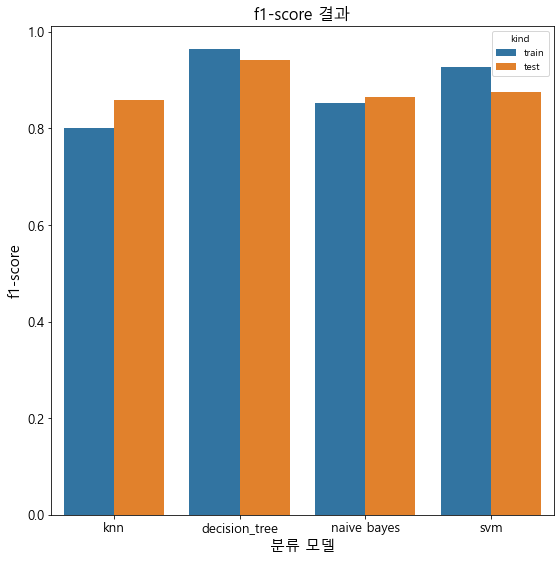

In [62]:
fig = plt.figure(figsize=(9, 9))
sns.barplot(data=result,x=result.index, y='f1-score', hue='kind' )
plt.title('f1-score 결과', fontsize=16)
plt.xlabel('분류 모델', fontsize=15)
plt.ylabel('f1-score', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()